# Object Detection YOLO

## Pasang YOLOv5

In [1]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 17075 (delta 27), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (11717/11717), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 21.9 MB/s eta 0:00:00


## Import Libary

In [2]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from ultralytics import YOLO
from PIL import Image
import cv2
import numpy as np
from tqdm import tqdm
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Download dataset

In [3]:
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2024-12-10 07:23:38--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.217.97, 52.217.175.113, 3.5.17.89, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.217.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  48.0MB/s    in 17s     

2024-12-10 07:23:56 (45.5 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2024-12-10 07:23:56--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.107.212, 52.216.218.25, 52.216.8.11, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.107.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 

## Buat Folder dan unzip Dataset

In [4]:
# Buat direktori untuk gambar dan anotasi
!mkdir -p ./coco/images
!mkdir -p ./coco/annotations

# Ekstrak file ZIP ke direktori yang sesuai
!unzip val2017.zip -d ./coco/images
!unzip annotations_trainval2017.zip -d ./coco/annotations


Streaming output truncated to the last 5000 lines.
 extracting: ./coco/images/val2017/000000365745.jpg  
 extracting: ./coco/images/val2017/000000320425.jpg  
 extracting: ./coco/images/val2017/000000481404.jpg  
 extracting: ./coco/images/val2017/000000314294.jpg  
 extracting: ./coco/images/val2017/000000335328.jpg  
 extracting: ./coco/images/val2017/000000513688.jpg  
 extracting: ./coco/images/val2017/000000158548.jpg  
 extracting: ./coco/images/val2017/000000132116.jpg  
 extracting: ./coco/images/val2017/000000415238.jpg  
 extracting: ./coco/images/val2017/000000321333.jpg  
 extracting: ./coco/images/val2017/000000081738.jpg  
 extracting: ./coco/images/val2017/000000577584.jpg  
 extracting: ./coco/images/val2017/000000346905.jpg  
 extracting: ./coco/images/val2017/000000433980.jpg  
 extracting: ./coco/images/val2017/000000228144.jpg  
 extracting: ./coco/images/val2017/000000041872.jpg  
 extracting: ./coco/images/val2017/000000117492.jpg  
 extracting: ./coco/images/val2

## Training Model

### SGD Optimizer

In [5]:
# Navigate to the yolov5 directory (if not already there)
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 5 --data coco128.yaml --weights yolov5s.pt --cache --optimizer SGD


[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:24:26.380964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:24:26.399905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:24:26.405652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

In [6]:
# Navigate to the yolov5 directory (if not already there)
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache --optimizer SGD


[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:26:06.359035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:26:06.380517: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:26:06.386331: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

In [7]:
# Navigate to the yolov5 directory (if not already there)
%cd yolov5
!python train.py --img 640 --batch 8 --epochs 5 --data coco128.yaml --weights yolov5s.pt --cache --optimizer SGD


[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:28:02.178914: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:28:02.211568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:28:02.221360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

In [8]:
# Navigate to the yolov5 directory (if not already there)
%cd yolov5
!python train.py --img 640 --batch 8 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache --optimizer SGD

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:29:36.188273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:29:36.208164: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:29:36.214111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

###  Adam Optimizer

In [9]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 5 --data coco128.yaml --weights yolov5s.pt --cache --optimizer Adam

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:31:33.379274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:31:33.413719: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:31:33.423639: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

In [10]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache --optimizer Adam

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:33:11.289840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:33:11.309427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:33:11.315246: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

In [11]:
%cd yolov5
!python train.py --img 640 --batch 8 --epochs 5 --data coco128.yaml --weights yolov5s.pt --cache --optimizer Adam

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:35:22.403827: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:35:22.435143: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:35:22.445152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

In [12]:
%cd yolov5
!python train.py --img 640 --batch 8 --epochs 25 --data coco128.yaml --weights yolov5s.pt --cache --optimizer Adam

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-12-10 07:37:33.325060: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-10 07:37:33.344526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-10 07:37:33.350570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account

## Save Model

In [13]:
# prompt: save model

# Save the trained model
!python export.py --weights runs/train/exp/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 85) (14.2 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 2.4s, saved as runs/train/exp/weights/best.torchscript (28.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 295.2 MB/s eta 0:00

## Uji Testing

In [14]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-389-ge62a31b6 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 437, in <module>
    main(opt)
  File "/content/yolov5/detect.py", line 432, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in d

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-10 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Silakan unggah gambar untuk deteksi:


Saving 05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg to 05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg
Melakukan deteksi untuk: 05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1: 604x907 8 persons, 2 cars, 1 motorcycle, 1 truck, 2 handbags
Speed: 15.0ms pre-process, 76.3ms inference, 945.7ms NMS per image at shape (1, 3, 448, 640)


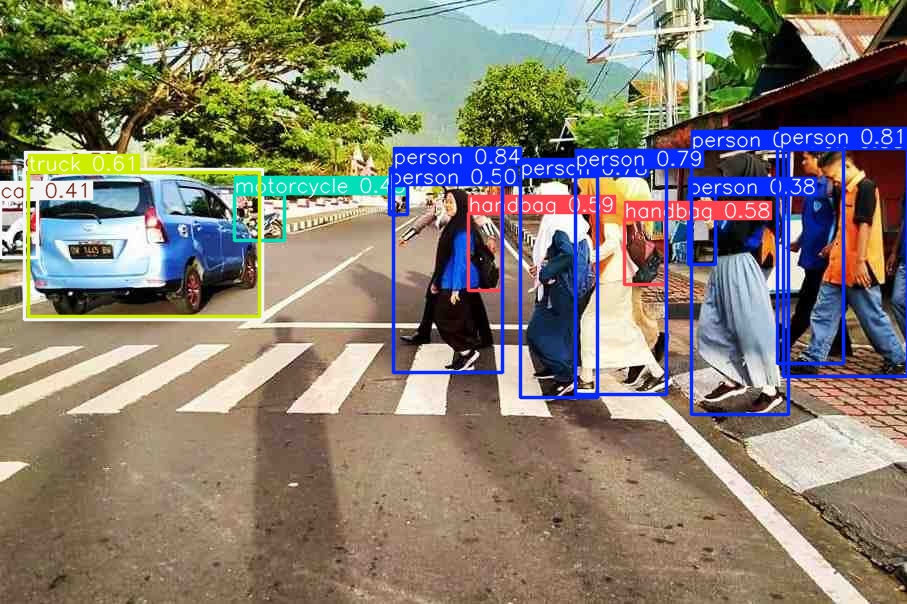

In [16]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk memuat model YOLOv5
def load_model(weights_path):
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)
    model.conf = 0.25  # Atur confidence threshold
    return model

# Fungsi untuk melakukan deteksi
def detect_objects(model, image_path):
    results = model(image_path, size=640)  # Hapus parameter `conf`
    return results

# Fungsi untuk memvisualisasikan hasil
def visualize_results(results, save_path=None):
    results.print()  # Cetak detail hasil deteksi
    results.show()   # Tampilkan gambar dengan bounding box

    # Simpan hasil jika diinginkan
    if save_path:
        results.save(save_dir=save_path)
        print(f"Hasil disimpan di: {save_path}")

# Path ke model yang dilatih
weights_path = "runs/train/exp/weights/best.pt"  # Ganti sesuai dengan lokasi model Anda
model = load_model(weights_path)

# Upload gambar untuk deteksi
print("Silakan unggah gambar untuk deteksi:")
uploaded_files = files.upload()

# Lakukan deteksi untuk setiap gambar yang diunggah
for file_name in uploaded_files.keys():
    image_path = file_name
    print(f"Melakukan deteksi untuk: {image_path}")

    # Deteksi objek
    results = detect_objects(model, image_path)

    # Visualisasi hasil
    visualize_results(results)
